In [133]:
from test_search import *
from wikiracer import *
from internet import *
import warnings
warnings.filterwarnings('ignore')

# Testing the correct operation of wikiracer

The current section tries to verify the correct operation of wikiracer. This is done by executing some tests implemented in test_search.py. If the test fails an assertion error is returned.

### Test 1:

All pages contain a link to themselves, which any search algorithm should recognize.


In [134]:
test_trivial()

### Test 2:
Searches going to page 1 distance away.

In [135]:
test_trivial_2()

### Test 3:
DFS depth 2 search

In [136]:
test_dijkstras_basic()

### Test 4
Program should return None on failure

In [137]:
test_none_on_fail()

### Test 5
Tests wikiracer speed on one input.
- A great implementation can do this in less than 8 internet requests.
- A good implementation can do this in less than 15 internet requests.
- A mediocre implementation can do this in less than 30 internet requests.

In [138]:
test_wikiracer_1()

****************************************************************************************************
New query, number of requests: 3 
Path: ['/wiki/Computer_science', '/wiki/Peter_J._Denning', '/wiki/Richard_Soley']


### Test 6
Tests wikiracer speed on one input.
- A great implementation can do this in less than 25 internet requests.
- A good implementation can do this in less than 80 internet requests.
- A mediocre implementation can do this in less than 300 internet requests.

In [139]:
test_wikiracer_2()

****************************************************************************************************
New query, number of requests: 4 
Path: ['/wiki/Waakirchen', '/wiki/Main_Page', '/wiki/English_language', '/wiki/A']


### Test 7
Tests wikiracer on multiple websites.
Does a combination of all links and calls wikiracer to tests those combinations.
This also tests that the path between pages is actually navigable
Beware: This function test take long time to run. You can change to a smaller list to verify
that your algorithm works.
The default test takes around 5-10 minutes when the pages are not cached.

In [140]:
test_wikiracer_multiple()

****************************************************************************************************
New query, number of requests: 3 
Path: ['/wiki/Jesus', '/wiki/Martin_Luther', '/wiki/Adolf_Hitler']
****************************************************************************************************
New query, number of requests: 6 
Path: ['/wiki/Jesus', '/wiki/ISBN_(identifier)', '/wiki/United_States', '/wiki/Michael_Jackson', '/wiki/Magic_Johnson', '/wiki/Michael_Jordan']
****************************************************************************************************
New query, number of requests: 3 
Path: ['/wiki/Jesus', '/wiki/Israel', '/wiki/United_Nations']
****************************************************************************************************
New query, number of requests: 8 
Path: ['/wiki/Jesus', '/wiki/ISBN_(identifier)', '/wiki/United_States', '/wiki/National_Basketball_Association', '/wiki/Kobe_Bryant']
*****************************************************

# Explanation with images

The next section explains the process of wikiracer transformed using images. For this, some functions implemented in wikiracer are imported. Our source is Michael Jordan and our goal is Brazil 

In [141]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


n_components = 2
scalar = StandardScaler()
pca = PCA(n_components)

def data_transformation(links, model, scalar, pca, fitting = False, n_components = 2):
    '''
    Transforms a list of wikipedia links into principal components through embedding, 
    normalization, and PCA (Principal Component Analysis).

    Parameters:
    links (list of str): A list of string names/links to be cleaned and transformed.
    model (SentenceTransformer or similar): A pre-trained model to encode the cleaned names into embeddings.
    fitting (bool): Indicates whether to fit the scalar and PCA models. If False, performs only transformation.
    scalar (Scaler object): A scaler (e.g., StandardScaler) for normalizing the embeddings.
    pca (PCA object): A PCA model to reduce the dimensionality of the embeddings.
    n_components (int, optional): Number of principal components to retain. Default is 2.

    Returns:
    pd.DataFrame: A DataFrame containing the principal components.

    Description:
    - Cleans the input `links` by removing the first 6 characters (/wiki/) and replacing underscores with spaces.
    - Encodes the cleaned names into embeddings using the provided model.
    - If `fitting` is True, it fits the scalar and PCA models to the embeddings and transforms the data. 
      Otherwise, it only transforms the data using the pre-fitted models.
    - Returns a DataFrame with the principal components and prints the explained variance ratio from the PCA model.
    '''
    n_components = 2

    cleaned_names = [name[6:].replace('_', " ") for name in links]

    embeding_names = model.encode(cleaned_names)

    if fitting:
        #Data normalization
        scaled_data = scalar.fit_transform(embeding_names)

        #PCA
        principal_components = pca.fit_transform(scaled_data)  

        print('Explained variance ratio:', round(sum(pca.explained_variance_ratio_),2))
    
    else:
        scaled_data = scalar.transform(embeding_names)

        principal_components = pca.transform(scaled_data)

    #Transforming to a pandas dataframe
    columns = [f'PC{i+1}' for i in range(n_components)]
    principal_df = pd.DataFrame(data=principal_components, columns=columns)

    return principal_df

In [142]:
def graphs(visited, pos_names, names, targets, connections = None, 
           arrow = False, num = 1, new_conection = False, title = None,
           name_fig = None):
    
    ''' 
    Plots a 2D scatterplot of principal component data for observed points, target points, 
    and optional connections between them. It also allows for visualizing arrows representing 
    connections between points and labeling specific points of interest.

    Parameters:

    visited (DataFrame): Data points representing "observed" nodes in the plot, with 
    columns 'PC1' and 'PC2'.

    pos_names (DataFrame): Positions of the specific nodes to be labeled on the plot, 
    with columns 'PC1' and 'PC2'.

    names (list of str): A list of names corresponding to pos_names 
    for labeling specific nodes.

    targets (DataFrame): Data points representing "target" nodes, 
    with columns 'PC1' and 'PC2'.

    connections (DataFrame, optional): Points that represent "connections" to be plotted, 
    with columns 'PC1' and 'PC2'. Default is None.

    arrow (bool, optional): Whether to draw arrows between the last point in 
    pos_names and each point in connections. Default is False.

    num (int, optional): Number of nodes from pos_names to be explicitly labeled. Default is 1.

    new_connection (bool, optional): Whether to add a new connection with an arrow to the 
    num-th node in pos_names. Default is False.

    title (str, optional): The title for the plot. Default is None.

    name_fig (str, optional): If provided, the plot is saved to the file path specified 
    by name_fig. Default is None.
    '''
    
    plt.figure(figsize=(8,6))
    sb.scatterplot(visited, x='PC1', y='PC2', s = 7.5, label= 'Observed', color = 'dodgerblue')

    sb.scatterplot(targets, x='PC1', y='PC2', s = 7.5, label= 'Targets', color = 'lime')
    

    if connections is not None:
        sb.scatterplot(connections, x='PC1', y='PC2', label = 'Connections', color = 'red')
        if arrow:
            for i, (pc1, pc2) in enumerate(zip(connections['PC1'], connections['PC2'])):
                plt.quiver(pos_names.iloc[-1]['PC1'], pos_names.iloc[-1]['PC2'], 
                           pc1-pos_names.iloc[-1]['PC1'], pc2-pos_names.iloc[-1]['PC2'], 
                           color = 'red', angles='xy', scale_units='xy', scale=1, width = 0.001)

    for j in range(num):
        plt.scatter(pos_names.iloc[j]['PC1'], pos_names.iloc[j]['PC2'], s = 20, label= None, color = 'black')
        plt.text(pos_names.iloc[j]['PC1']-0.5, pos_names.iloc[j]['PC2']-1, names[j], 
                 color = 'black', weight='bold')

    plt.scatter(pos_names.iloc[-1]['PC1'], pos_names.iloc[-1]['PC2'], s = 20, label= 'Nodes', color = 'black')
    plt.text(pos_names.iloc[-1]['PC1']-0.5, pos_names.iloc[-1]['PC2']-1, names[-1], 
             color = 'black', weight='bold')

    if new_conection:
        plt.scatter(pos_names.iloc[num]['PC1'], pos_names.iloc[num]['PC2'], s = 20, 
                    label= None, color = 'black')
        plt.text(pos_names.iloc[num]['PC1']-0.5, pos_names.iloc[num]['PC2']-1, names[num], 
                 color = 'black', weight='bold')

        pc1 = pos_names.iloc[num]['PC1']
        pc2 = pos_names.iloc[num]['PC2']
        plt.quiver(pos_names.iloc[-1]['PC1'], pos_names.iloc[-1]['PC2'], pc1-pos_names.iloc[-1]['PC1'], 
                   pc2-pos_names.iloc[-1]['PC2'], color = 'red', angles='xy', scale_units='xy', scale=1, 
                   width = 0.003)


    plt.title(title)
    plt.legend()
    plt.grid()
    if name_fig is not None:
        plt.savefig(name_fig)
    plt.show()
    


def final_graph(visited, pos_names, names, targets, 
                title = None, name_fig = None):
    
    ''' 
    Visualizes observed points, target points, and a sequence of labeled nodes 
    connected by a final path in a 2D scatterplot. This is ideal for showcasing the 
    relationships between observed and target data, along with a specific set of 
    important nodes (or a path) connecting these points.


    Parameters:

    visited (DataFrame): Data points representing "observed" nodes, with columns 'PC1' and 'PC2'.

    pos_names (DataFrame): Data points representing the positions of specific nodes to be connected 
    by a path, with columns 'PC1' and 'PC2'.

    names (list of str): Names corresponding to pos_names, used for labeling specific nodes.

    targets (DataFrame): Data points representing "target" nodes, with columns 'PC1' and 'PC2'.

    title (str, optional): The title for the plot. Default is None.

    name_fig (str, optional): If provided, the plot is saved to the file path specified by name_fig. 
    Default is None.
    '''
    
    plt.figure(figsize=(8,6))
    sb.scatterplot(visited, x='PC1', y='PC2', s = 7.5, label= 'Observed', color = 'dodgerblue')

    sb.scatterplot(targets, x='PC1', y='PC2', s = 7.5, label= 'Targets', color = 'lime')
    
    plt.scatter(pos_names['PC1'], pos_names['PC2'], s = 20, label= 'Nodes', color = 'black')
    plt.plot(pos_names['PC1'], pos_names['PC2'], color = 'black', label = 'Final Path')


    for j in range(len(names)):
        plt.text(pos_names.iloc[j]['PC1']-0.5, pos_names.iloc[j]['PC2']-1, names[j], 
                 color = 'black', weight='bold')

    plt.title(title)
    plt.legend()
    plt.grid()
    if name_fig is not None:
        plt.savefig(name_fig)
    plt.show()

    

In [143]:
model = SentenceTransformer("all-MiniLM-L6-v2", similarity_fn_name=SimilarityFunction.EUCLIDEAN)

source = '/wiki/Michael_Jordan'
goal = '/wiki/Brazil'

racer = WikiracerProblem()
path = racer.wikiracer(source=source, goal=goal)

#Extracting the names as without the link format
names = [name[6:].replace('_', " ") for name in path]

****************************************************************************************************
New query, number of requests: 4 
Path: ['/wiki/Michael_Jordan', '/wiki/United_States', '/wiki/Mexico', '/wiki/Brazil']


Explained variance ratio: 0.11


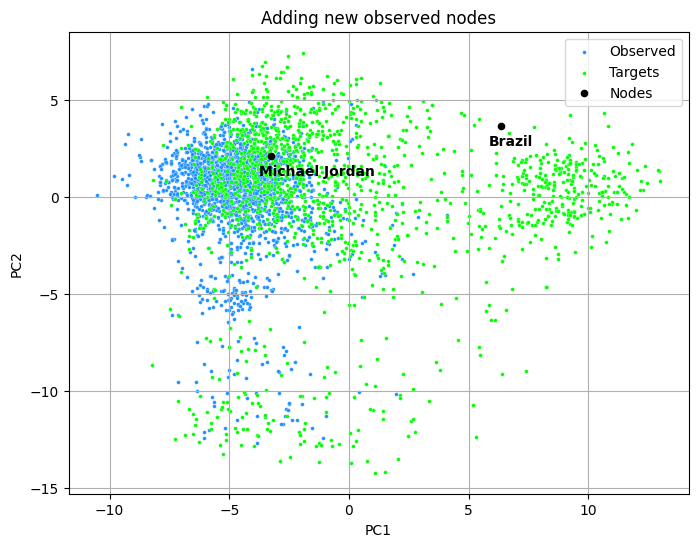

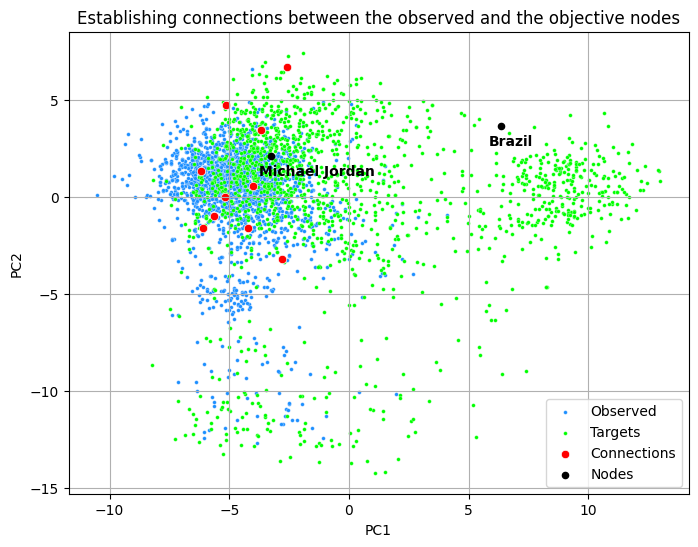

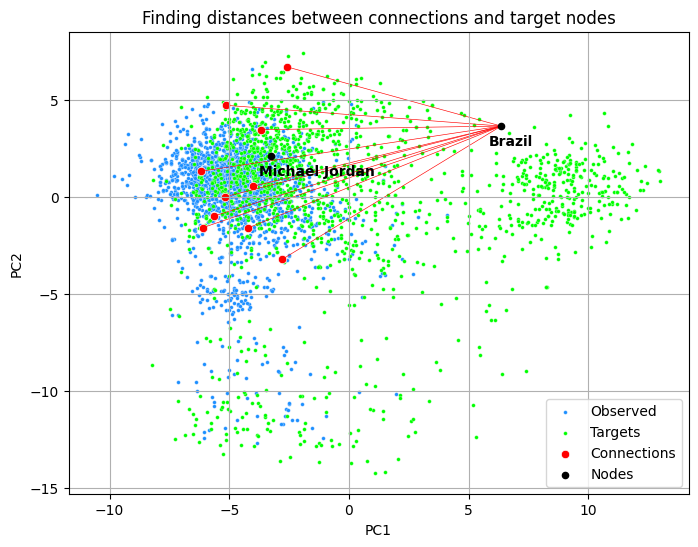

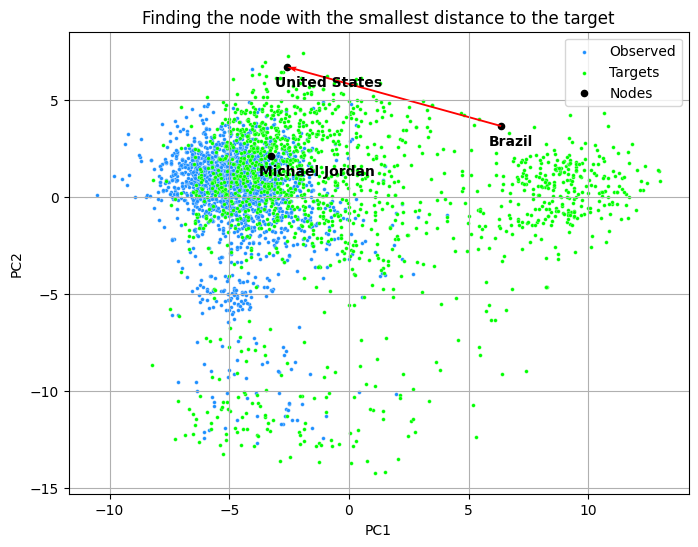

/wiki/United_States


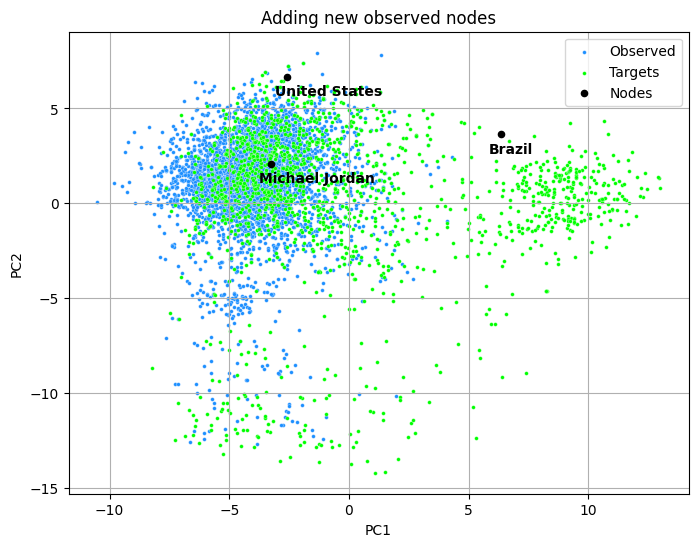

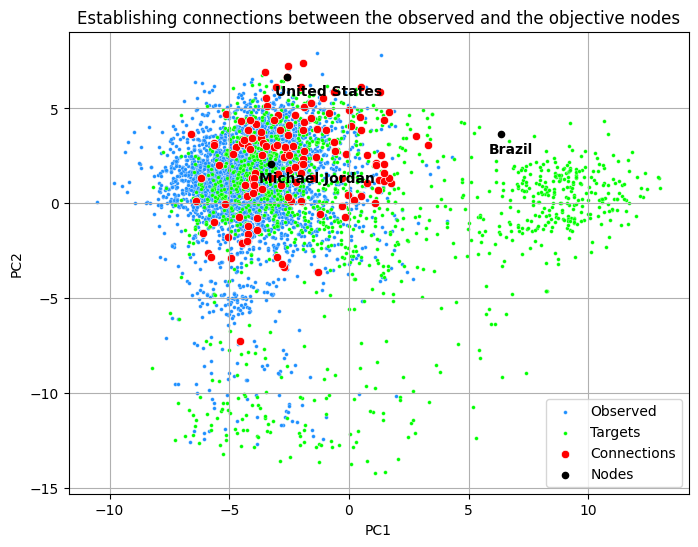

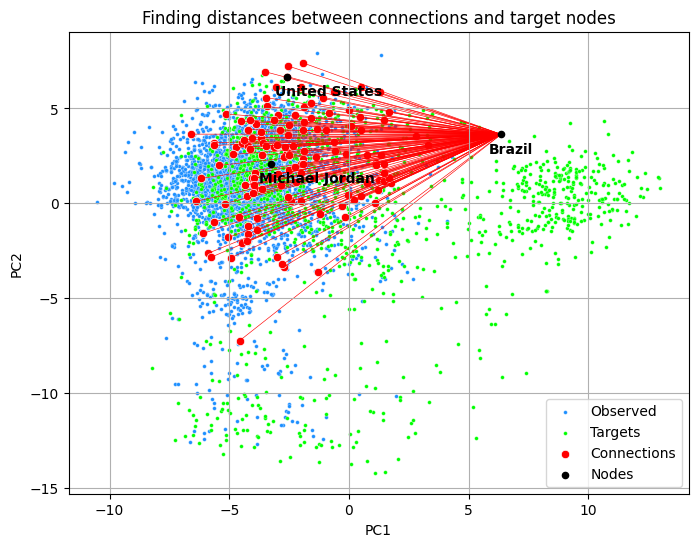

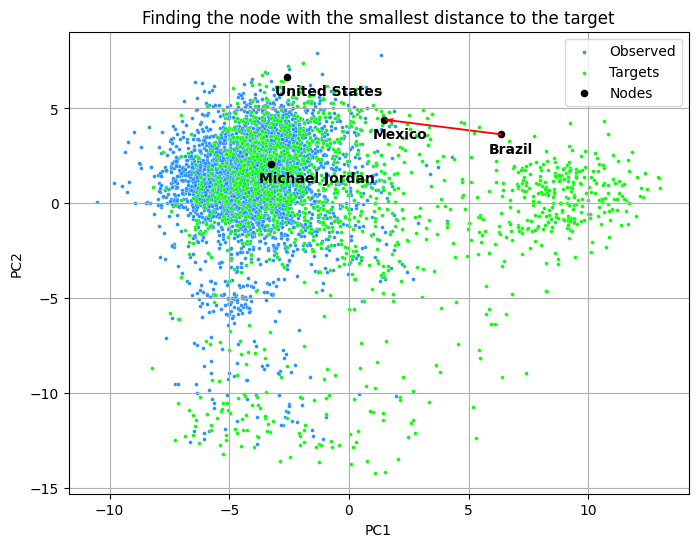

/wiki/Mexico


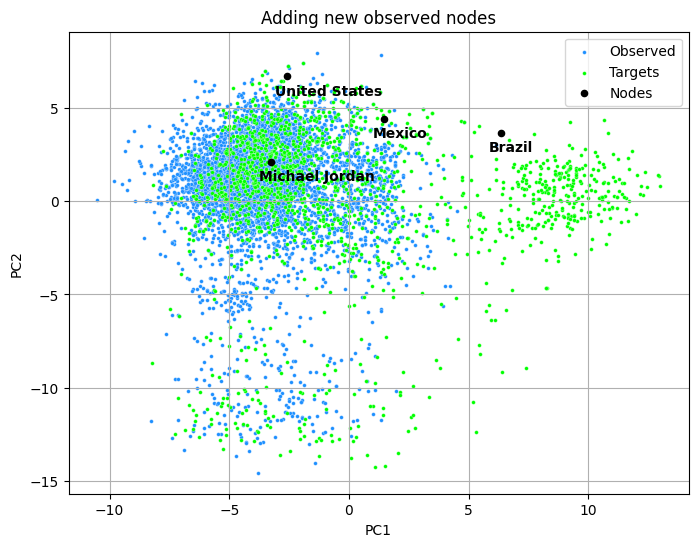

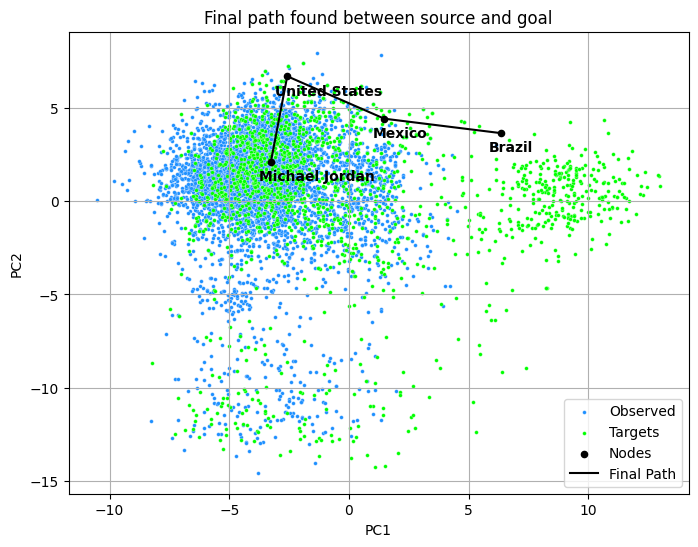

In [144]:
# Initialize an instance of the Internet class to access web pages
internet = Internet()

# Fetch the HTML content of the target page (goal) using the internet instance
html_targets = internet.get_page(goal)

# Parse and extract all the links from the target page
targets = set(Parser.get_links_in_page(html_targets))

# Transform the target links into principal components for visualization using PCA
transformed_targets = data_transformation(targets, model, fitting=True, scalar=scalar,
                                          pca=pca)

# Transform the links in the path (a predefined sequence of pages) using the same PCA model
transformed_path = data_transformation(path, model, fitting=False, scalar=scalar,
                                          pca=pca)

# Initialize the first page to start scraping (source)
page = source

# Initialize a set to keep track of all visited pages, starting with the source page
visited = {source}

# Initialize a counter to control the number of labeled nodes in the plot
num = 1

# Continue searching until the current page equals the final page in the path
while page != path[-1]:
    # Retrieve the HTML content of the current page
    html = internet.get_page(page)
    
    # Extract all links found on the current page
    links = Parser.get_links_in_page(html)

    # Add the newly found links to the visited set (to avoid re-visiting)
    visited = visited.union(set(links))

    # Check if any of the links in the visited set are part of the target set
    connection = list(visited.intersection(targets))

    # Transform the visited links into principal components for visualization
    transformed_visited = data_transformation(visited, model, fitting=False, scalar=scalar,
                                              pca=pca)

    # Transform the intersecting links (connections) into principal components if any exist
    transformed_conections = data_transformation(connection, model, fitting=False, scalar=scalar,
                                                 pca=pca)
    
    # Plot the visited links, the target links, and the current path using the graph function
    graphs(transformed_visited, transformed_path, names, transformed_targets, 
           num=num, title='Adding new observed nodes', name_fig = f'g1_{num}.png')

    # If there is a connection between the visited pages and the targets
    if len(connection) != 0:
        # Compute the word distance (semantic similarity) between the connections and the goal
        d = word_distance(model, connection, [goal])
        
        # Redefine the current page as the link in the connection set closest to the goal
        page = connection[d]
        
        # If the current page is the goal, stop the search
        if page == goal:
            break

    # If no connection is found between visited pages and targets
    else:
        # Convert the visited set into a list for processing
        data1 = list(visited)
        
        # Find the link in the visited pages that is closest to any of the target links
        d = word_distance(model, data1, targets)
        
        # Redefine the page to be the one with the smallest distance to the target
        page = data1[d]

    # Update the plot with the transformed visited pages, path, and any connections found
    graphs(transformed_visited, transformed_path, names, transformed_targets, 
           transformed_conections, num=num, 
           title='Establishing connections between the observed and the objective nodes', 
           name_fig = f'g2_{num}.png')
    
    # Plot again, this time showing arrows between nodes (connections)
    graphs(transformed_visited, transformed_path, names, transformed_targets, 
           transformed_conections, True, num=num, 
           title = 'Finding distances between connections and target nodes', 
           name_fig = f'g3_{num}.png')
    
    # Plot once more, adding a new connection to the graph
    graphs(transformed_visited, transformed_path, names, transformed_targets, 
           num=num, new_conection=True, 
           title = 'Finding the node with the smallest distance to the target',
           name_fig = f'g4_{num}.png')

    # Print the current page being processed
    print(page)
    
    # Increment the counter for labeling nodes in subsequent iterations
    num += 1

# After the loop, plot the final graph showing the visited pages and the final path
final_graph(transformed_visited, transformed_path, names, transformed_targets,
            title = 'Final path found between source and goal', name_fig = 'final.png')


## What if there are not more connections?

A subtle issue arises when no further connections exist between the observed nodes and the target nodes. In such cases, WikiRacer Transformed calculates the distances between all observed and target nodes, and selects as the next page the observed node with the smallest distance to any target node.

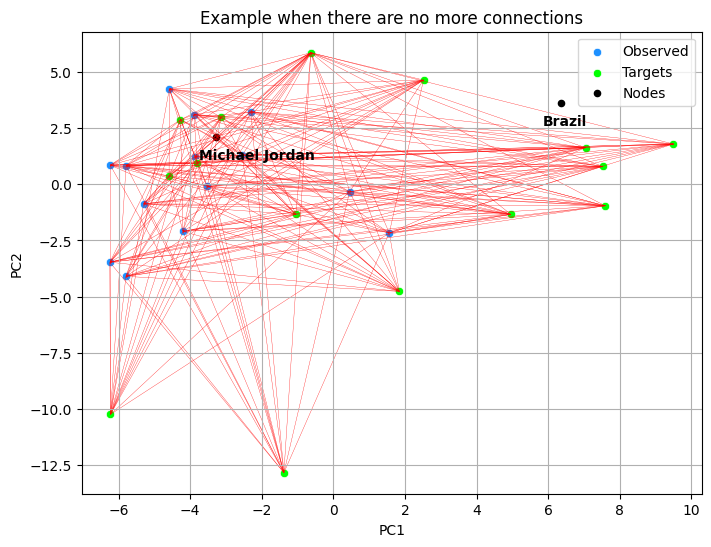

In [145]:
# Define the number of points to visualize (e.g., 15)
num = 15 

# Create a new figure with specified size (8x6 inches)
plt.figure(figsize=(8,6))

# Plot the first 'num' observed nodes using a scatterplot, color-coded as 'dodgerblue'
sb.scatterplot(transformed_visited[:num], x='PC1', y='PC2', label='Observed', color='dodgerblue')

# Plot the first 'num' target nodes using a scatterplot, color-coded as 'lime'
sb.scatterplot(transformed_targets[:num], x='PC1', y='PC2', label='Targets', color='lime')

# Highlight and label the starting point of the path (first node) in black
plt.scatter(transformed_path.iloc[0]['PC1'], transformed_path.iloc[0]['PC2'], s=20, label=None, color='black')
plt.text(transformed_path.iloc[0]['PC1']-0.5, transformed_path.iloc[0]['PC2']-1, 
         names[0], color='black', weight='bold')

# Iterate over the first 'num' observed and target nodes to draw arrows (quivers) representing
# connections between the observed and target nodes
for i, (pc1, pc2) in enumerate(zip(transformed_visited[:num]['PC1'], transformed_visited[:num]['PC2'])):
    for j, (pc11, pc22) in enumerate(zip(transformed_targets[:num]['PC1'], transformed_targets[:num]['PC2'])):
        # Draw an arrow from each target node to each observed node
        plt.quiver(pc11, pc22, pc1-pc11, pc2-pc22, color='red', angles='xy', scale_units='xy', scale=1, 
                   width=0.0005)

# Highlight and label the last point in the path (final node) in black
plt.scatter(transformed_path.iloc[-1]['PC1'], transformed_path.iloc[-1]['PC2'], s=20, 
            color='black', label='Nodes')
plt.text(transformed_path.iloc[-1]['PC1']-0.5, transformed_path.iloc[-1]['PC2']-1, 
         names[-1], color='black', weight='bold')

# Set the plot title to explain the scenario being visualized
plt.title('Example when there are no more connections')

# Display the legend for the plot
plt.legend()

# Enable grid lines for better visualization of the plot
plt.grid()

# Optional: Save the plot as an image file (commented out)
# plt.savefig('ff1.png')


##  How are the values of the links/names distributed after embedding?

The current implementation of WikiRace Transformed utilizes the Sentence Transformer library. To better understand the distribution of the embedded values, the following graph is presented.

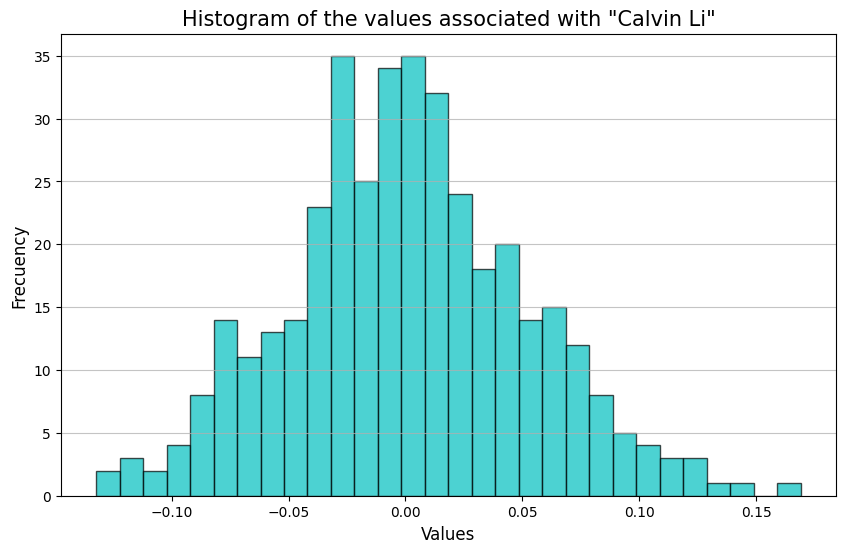

In [146]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

name_encoded = model.encode(['Calvin Li'])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(name_encoded[0], bins=30, edgecolor='black', alpha=0.7, color='c')

# Add titles and labels
plt.title('Histogram of the values associated with "Calvin Li"', fontsize=15)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)

# Customize the grid
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Test with random links

Finally, a test with random links is conducted. The following section generates 12 random links (and thus 66 pair combinations) using the get_random method from the Internet class. The goal is to assess the robustness of WikiRacer Transformed under random conditions.

In [147]:
#These lines of code will generate new random links
'''
#Generating random links from wikipedia
links = set()

internet = Internet()

for _ in range(12):

    html = internet.get_random()
    link = set(Parser.get_links_in_page(html))
    links.add(link.pop())

links = list(links)
#Showing the first 5 links
print(links[:5])


with open('random_links.txt', 'w') as f:
    for line in links:
        f.write(f"{line}\n")
'''

'\n#Generating random links from wikipedia\nlinks = set()\n\ninternet = Internet()\n\nfor _ in range(12):\n\n    html = internet.get_random()\n    link = set(Parser.get_links_in_page(html))\n    links.add(link.pop())\n\nlinks = list(links)\n#Showing the first 5 links\nprint(links[:5])\n\n\nwith open(\'random_links.txt\', \'w\') as f:\n    for line in links:\n        f.write(f"{line}\n")\n'

In [148]:
with open('random_links.txt', 'r') as file:
    lines = file.readlines()

# Remove any trailing newline characters
links = [line.strip() for line in lines]
links


['/wiki/Contributing_property',
 '/wiki/Given_name',
 '/wiki/Dictionary_of_National_Biography',
 '/wiki/U.S._Route_6',
 '/wiki/Saint-Jean-de-Duras',
 '/wiki/ISSN_(identifier)',
 '/wiki/Arthropod',
 '/wiki/Arbroath',
 '/wiki/A370_road',
 '/wiki/EuroBasket_Women_2015_Group_B',
 '/wiki/Wikidata',
 '/wiki/National_Register_of_Historic_Places_listings_in_Defiance_County,_Ohio']

In [149]:
#WARNING!!! The next lines could take up several minutes or even hours to run!!!
import itertools

pages = list(itertools.product(links, repeat=2))
path_len = []
request_len = []
racer = WikiracerProblem()
for pag1, pag2 in pages:
    try:
        path = racer.wikiracer(source=pag1, goal=pag2, safe = 25)
        path_len.append(len(path))
        num_req = racer.internet.requests 
        request_len.append(len(num_req))
    except:
        print('Path not found')
        path_len.append(np.nan)
        request_len.append(np.nan)

****************************************************************************************************
New query, number of requests: 2 
Path: ['/wiki/Contributing_property', '/wiki/Contributing_property']
****************************************************************************************************
New query, number of requests: 4 
Path: ['/wiki/Contributing_property', '/wiki/ISBN_(identifier)', '/wiki/Identifier', '/wiki/Given_name']
****************************************************************************************************
New query, number of requests: 14 
Path: ['/wiki/Contributing_property', '/wiki/ISBN_(identifier)', '/wiki/United_Kingdom', '/wiki/Historiography_of_the_United_Kingdom', '/wiki/Dictionary_of_National_Biography']
****************************************************************************************************
New query, number of requests: 7 
Path: ['/wiki/Contributing_property', '/wiki/ISBN_(identifier)', '/wiki/United_States', '/wiki/Colorado', '/

In [150]:
def tuple_graph(request_len, path_len, name_fig=None):
    """
    This function generates a line graph that visualizes the relationship between the 
    length of the path (number of nodes) and the number of requests made. It also 
    plots the mean values for both the path lengths and the requests as horizontal 
    lines.

    Parameters:
    - request_len (list): A list of integers representing the number of requests made.
    - path_len (list): A list of integers representing the length of the paths.
    - name_fig (str, optional): The filename to save the figure. If None, the figure is not saved.

    Returns:
    - None: The function generates and displays a plot.

    """
    # Create a new figure with specified size
    plt.figure(figsize=(7, 5))
    
    # Plot the path length and number of requests as lines with markers
    plt.plot(path_len, '-o', label='Path length')
    plt.plot(request_len, '-o', label='Number of requests')

    # Add a horizontal line representing the mean path length
    plt.axhline(y=np.nanmean(path_len), color='b', linestyle='--', linewidth=1, 
                label=f'Path mean: {np.nanmean(path_len):.2f}')
    
    # Add a horizontal line representing the mean of the request lengths
    plt.axhline(y=np.nanmean(request_len), color='orange', linestyle='--', linewidth=1, 
                label=f'Requests mean: {np.nanmean(request_len):.2f}')
    
    # Add grid lines to the plot
    plt.grid()

    # Display the legend with labels for the lines and means
    plt.legend()

    # Label the x-axis and y-axis
    plt.xlabel('Tuple Number')
    plt.ylabel('Count')

    # If a filename is provided, save the figure as a PNG
    if name_fig is not None:
        plt.savefig(f'{name_fig}.png')
    
    # Display the plot
    plt.show()

In [151]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

def plot_bar_with_mean(df, column, title=None, fig_name=None):
    """
    Creates a bar plot with counts on the x-axis and column on the y-axis. 
    Column elements with long names are split into two lines, and a vertical line shows the mean of the counts.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing a certain column and 'counts' columns.
    column (str): Name of the column whose elements will be plotted.
    title (str, optiona): Title of the graph.
    fig_name (str, optional): The filename to save the figure. If None, the figure is not saved.
    
    Returns:
    None: Displays the plot.
    """
    # Calculate the mean of the counts
    mean_count = np.mean(df['count'])

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Create a barplot with counts on the x-axis and sources on the y-axis
    sb.barplot(x='count', y=column, data=df)

    # Add the vertical line showing the mean of the counts
    plt.axvline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

    # Adjust the y-axis labels (split long names into two lines)
    def split_text(text, width=30):
        if len(text) > width:
            return '\n'.join([text[i:i+width] for i in range(0, len(text), width)])
        else:
            return text

    # Update y-tick labels to have split names
    plt.gca().set_yticklabels([split_text(source) for source in df[column]])

    # Add title and labels
    plt.title(title)
    plt.xlabel('Counts')
    plt.ylabel(None)
    plt.grid()

    # Show the legend for the mean line
    plt.legend()

    # Show the plot
    plt.tight_layout()
    # If a filename is provided, save the figure as a PNG
    if fig_name is not None:
        plt.savefig(f'{fig_name}.png')
    plt.show()

In [ ]:
def source_and_goal_counts(pages_tuples, path_len):
    """
    This function processes a list of page tuples (source and goal) and counts the number of occurrences 
    for each source and goal page based on the provided path lengths. The function removes the '/wiki/' 
    prefix from the page names and replaces underscores with spaces to improve readability.

    Parameters:
    pages_tuples (list of tuples): Each tuple contains the source and goal Wikipedia page links in the format '/wiki/Page_Name'.
    path_len (list): A list of path lengths corresponding to the number of steps taken between the source and goal pages.

    Returns:
    tuple: Two pandas DataFrames - 
           1. sources_counts: A DataFrame of unique sources and their counts, sorted by frequency.
           2. goal_counts: A DataFrame of unique goals and their counts, sorted by frequency.
    """
    
    # Define column names for the DataFrame
    columns = ['sources', 'goal']
    
    # Create a DataFrame from the list of page tuples (sources and goals)
    df = pd.DataFrame(pages_tuples, columns=columns)
    
    # Add a new column 'path_len' representing the path lengths for each tuple
    df['path_len'] = path_len
    
    # Clean up the 'sources' column: remove the '/wiki/' prefix and replace underscores with spaces
    df['sources'] = df['sources'].str[6:].str.replace('_', ' ')
    
    # Clean up the 'goal' column: remove the '/wiki/' prefix and replace underscores with spaces
    df['goal'] = df['goal'].str[6:].str.replace('_', ' ')
    
    # Drop rows where 'path_len' is NaN (if any), and count the occurrences of each source page
    sources_counts = df.dropna(subset='path_len').value_counts('sources').sort_values(ascending=False)
    
    # Convert the counts to a DataFrame and reset the index to convert the series back to a DataFrame
    sources_counts = pd.DataFrame(sources_counts).reset_index()
    
    # Similarly, count the occurrences of each goal page after dropping NaN values in 'path_len'
    goal_counts = df.dropna(subset='path_len').value_counts('goal').sort_values(ascending=False)
    
    # Convert the goal counts to a DataFrame and reset the index
    goal_counts = pd.DataFrame(goal_counts).reset_index()
    
    # Return two DataFrames: one for source counts and one for goal counts
    return sources_counts, goal_counts


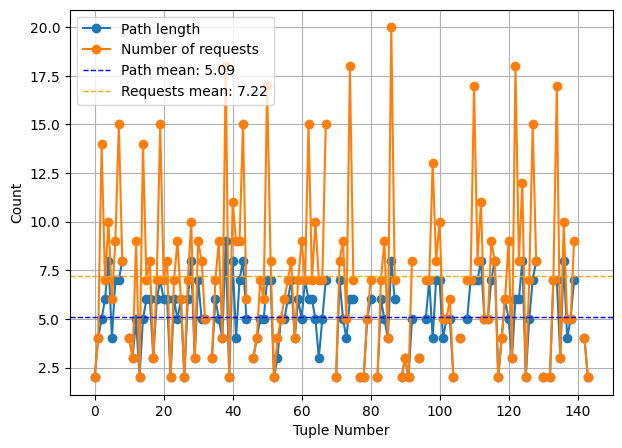

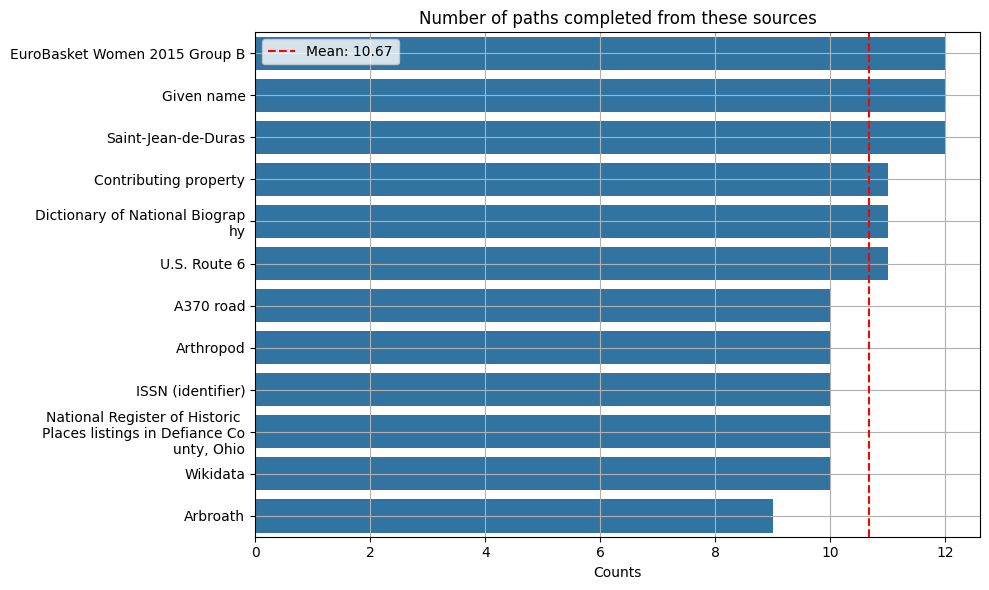

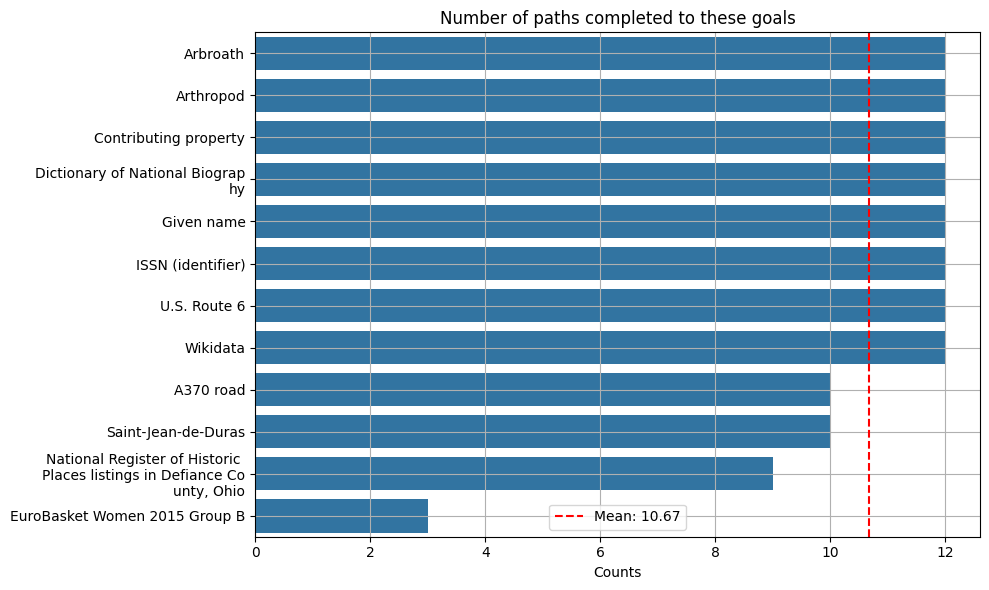

In [153]:
tuple_graph(request_len, path_len, name_fig='tuple2')
sources_counts, goal_counts = source_and_goal_counts(pages, path_len)
plot_bar_with_mean(sources_counts, 'sources', 
                   'Number of paths completed from these sources',
                   fig_name='bar_sources2')
plot_bar_with_mean(goal_counts, 'goal', 
                   'Number of paths completed to these goals',
                   fig_name='bar_goals2')

Repeating the last proccess for the 'easy' nodes provided by the test_wikiracer_multiple function()

In [154]:
easy_links = ['Jesus', 'Adolf_Hitler', 'Michael_Jordan', 'United_Nations', 'Kobe_Bryant', 'Brazil']
easy_links = ['/wiki/' + link for link in easy_links]

easy_pages = list(itertools.product(easy_links, repeat=2))

easy_path_len = []
easy_request_len = []

racer = WikiracerProblem()
for pag1, pag2 in easy_pages:
    try:
        path = racer.wikiracer(source=pag1, goal=pag2, safe = 25)
        easy_path_len.append(len(path))
        num_req = racer.internet.requests 
        easy_request_len.append(len(num_req))
    except:
        print('Path not found')
        easy_path_len.append(np.nan)
        easy_request_len.append(np.nan)

****************************************************************************************************
New query, number of requests: 2 
Path: ['/wiki/Jesus', '/wiki/Jesus']
****************************************************************************************************
New query, number of requests: 3 
Path: ['/wiki/Jesus', '/wiki/Martin_Luther', '/wiki/Adolf_Hitler']
****************************************************************************************************
New query, number of requests: 6 
Path: ['/wiki/Jesus', '/wiki/ISBN_(identifier)', '/wiki/United_States', '/wiki/Michael_Jackson', '/wiki/Magic_Johnson', '/wiki/Michael_Jordan']
****************************************************************************************************
New query, number of requests: 3 
Path: ['/wiki/Jesus', '/wiki/Israel', '/wiki/United_Nations']
****************************************************************************************************
New query, number of requests: 8 
Path: ['/wiki/J

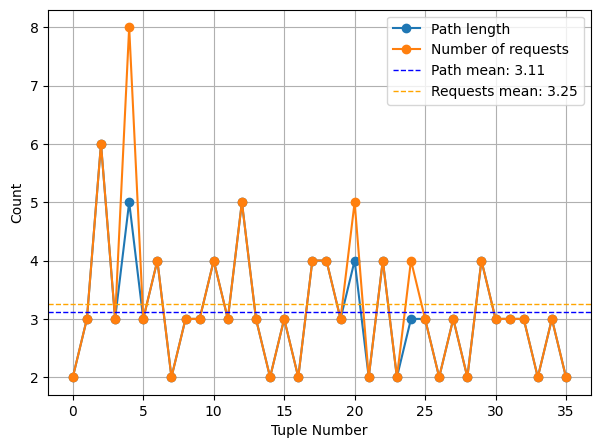

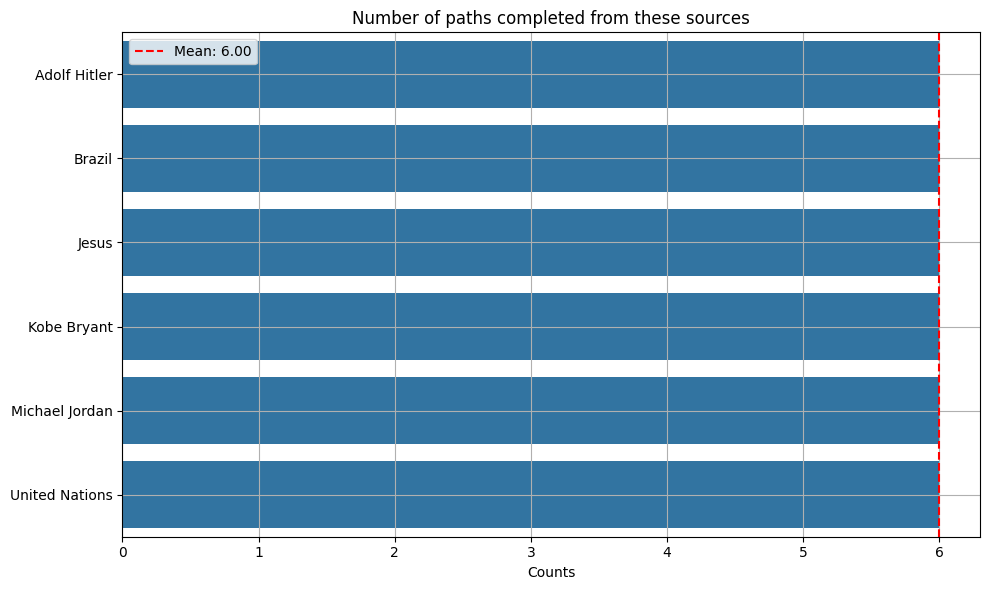

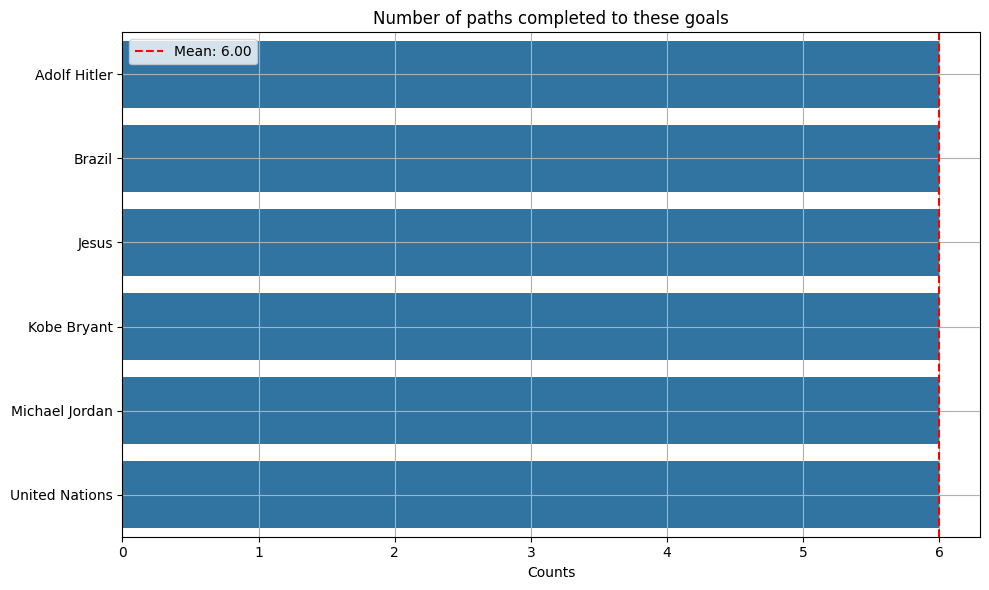

In [155]:
tuple_graph(easy_request_len, easy_path_len, name_fig='tuple1')
sources_counts, goal_counts = source_and_goal_counts(easy_pages, easy_path_len)
plot_bar_with_mean(sources_counts, 'sources', 
                   'Number of paths completed from these sources',
                   fig_name='bar_sources1')
plot_bar_with_mean(goal_counts, 'goal', 
                   'Number of paths completed to these goals',
                   fig_name='bar_goals1')